In [1]:
# project: p12
# submitter: Smwells3
# partner: none

In [2]:
import time, requests, os, sqlite3, math, collections, copy, json
import pandas as pd
from pandas import DataFrame, Series
from collections import defaultdict
from bs4 import BeautifulSoup

In [3]:
def download(filename, url):
    if os.path.exists(filename):
        return (str(filename) + " already exists!")
    r = requests.get(url)
    urltxt = r.text
    f = open(filename, "w")
    f.write(urltxt)
    f.close()
    return (str(filename) + " created!")

In [4]:
download("countries.json", "https://raw.githubusercontent.com/msyamkumar/cs220-f20-projects/master/p12/countries.json")

'countries.json already exists!'

In [5]:
countries = pd.read_json("countries.json")
countries.head()

,area,birth-rate,coastline,continent,country,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population,region
0,756950,15.23,0.85,South America,Chile,5.81,9900,8.80,"96,2",0.00,"213,0",16134219,LATIN AMER. & CARIB
1,665,17.80,24.21,Asia,Bahrain,4.14,16900,17.27,"89,1",1.05,"281,3",698585,NEAR EAST
2,22966,28.84,1.68,North America,Belize,5.72,4900,25.69,"94,1",0.00,"115,7",287730,LATIN AMER. & CARIB
3,582650,39.72,0.09,Africa,Kenya,14.02,1000,61.47,"85,1",-0.10,"8,1",34707817,SUB-SAHARAN AFRICA
4,11854,33.05,3.12,Australia,Marshall Islands,4.78,1600,29.45,"93,7",-6.04,"91,2",60422,OCEANIA


In [6]:
#q1
len(countries)

174

In [7]:
#q2
countries["population"].sum()

6261901793

In [8]:
download("capitals.json","https://raw.githubusercontent.com/msyamkumar/cs220-f20-projects/master/p12/capitals.json")

'capitals.json already exists!'

In [9]:
capitals = pd.read_json("capitals.json")
capitals.head()

,country,capital,latitude,longitude
0,Afghanistan,Kabul,34.516667,69.183333
1,Albania,Tirana,41.316667,19.816667
2,Algeria,Algiers,36.750000,3.050000
3,Anguilla,The Valley,18.216667,-63.050000
4,Argentina,Buenos Aires,-34.583333,-58.666667


In [10]:
#q3
sorted(list(capitals["capital"]))

['Abu Dhabi',
 'Abuja',
 'Accra',
 'Addis Ababa',
 'Algiers',
 'Amman',
 'Amsterdam',
 'Ankara',
 'Antananarivo',
 'Apia',
 'Ashgabat',
 'Asmara',
 'Astana',
 'Asuncion',
 'Athens',
 'Baghdad',
 'Baku',
 'Bamako',
 'Bangkok',
 'Beijing',
 'Beirut',
 'Belmopan',
 'Berlin',
 'Bern',
 'Bishkek',
 'Bissau',
 'Bogota',
 'Brasilia',
 'Bridgetown',
 'Brussels',
 'Bucharest',
 'Budapest',
 'Buenos Aires',
 'Bujumbura',
 'Cairo',
 'Canberra',
 'Caracas',
 'Castries',
 'Chisinau',
 'Colombo',
 'Conakry',
 'Copenhagen',
 'Dakar',
 'Damascus',
 'Dar es Salaam',
 'Dhaka',
 'Djibouti',
 'Doha',
 'Dublin',
 'Dushanbe',
 'Freetown',
 'Gaborone',
 'George Town',
 'Georgetown',
 'Guatemala City',
 'Hagatna',
 'Hamilton',
 'Hanoi',
 'Harare',
 'Havana',
 'Helsinki',
 'Islamabad',
 'Jakarta',
 'Jamestown',
 'Jerusalem',
 'Kabul',
 'Kampala',
 'Kathmandu',
 'Khartoum',
 'Kigali',
 'Kingston',
 'Kingstown',
 'Kuala Lumpur',
 'Kuwait City',
 'Kyiv',
 'La Paz',
 'Libreville',
 'Lilongwe',
 'Lima',
 'Lisbon',


In [11]:
#q4
next(iter(capitals[capitals["country"] == "Italy"]["capital"]))

'Rome'

In [12]:
#q5
next(iter(capitals[capitals["capital"] == "Brussels"]["country"]))

'Belgium'

In [13]:
#q6
def get_latitude(country):
    latitude = next(iter(capitals[capitals["country"] == country]["latitude"]))
    return latitude
country_list = []
for country in countries['country']:
    country_list.append(country)
south_sorted = sorted(country_list, key=get_latitude)
south_sorted[:7]

['New Zealand',
 'Australia',
 'Uruguay',
 'Argentina',
 'Chile',
 'Lesotho',
 'Swaziland']

In [14]:
#q7
sorted(country_list, key=get_latitude, reverse=True)[:10]

['Iceland',
 'Finland',
 'Norway',
 'Estonia',
 'Sweden',
 'Latvia',
 'Russia',
 'Denmark',
 'Lithuania',
 'Belarus']

In [15]:
#q8
def get_area(country):
    area = next(iter(countries[countries["country"] == country]["area"]))
    return area    
land_locked = countries[countries["coastline"] == 0]
asian_land_locked = land_locked[land_locked["continent"] == "Asia"]
asian_ll = []
for country in asian_land_locked["country"]:
    asian_ll.append(country)
sorted(asian_ll, key=get_area)[0]

'Bhutan'

In [16]:
#q9
coastal = countries[countries["coastline"] != 0]
asian_coastal = coastal[coastal["continent"] == "Asia"]
coastal_asian = []
for country in asian_coastal["country"]:
    coastal_asian.append(country)
sorted(coastal_asian, key=get_area, reverse=True)[0]

'China'

In [17]:
def get_population(country):
    population = next(iter(countries[countries["country"] == country]["population"]))
    return population

In [18]:
#q10
south_american_coastal = coastal[coastal["continent"] == "South America"]
coastal_south_american = []
for country in south_american_coastal["country"]:
    coastal_south_american.append(country)
sorted(coastal_south_american, key=get_population)[0]

'Suriname'

In [19]:
#formula from http://www.movable-type.co.uk/scripts/gis-faq-5.1.html
def distance(lon1, lat1, lon2, lat2):
    lon1 *= math.pi/180
    lon2 *= math.pi/180
    lat1 *= math.pi/180
    lat2 *= math.pi/180
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.asin(min(1,math.sqrt(a)))
    d = 3956 * c
    return d

In [20]:
#q11
distance(-89.411893, 43.070231, -89.384113, 43.074645)

1.433899492072933

In [21]:
def distance_countries(country1, country2):
    lat1 = next(iter(capitals[capitals["country"] == country1]["latitude"]))
    lon1 = next(iter(capitals[capitals["country"] == country1]["longitude"]))
    lat2 = next(iter(capitals[capitals["country"] == country2]["latitude"]))
    lon2 = next(iter(capitals[capitals["country"] == country2]["longitude"]))
    return distance(lon1, lat1, lon2, lat2)

In [22]:
#q12
distance_countries("Germany", "Norway")

520.8581822565818

In [23]:
def distance_dict(country_list): 
    all_distance = defaultdict(dict)
    for country in country_list:
        all_distance[country] = {}
        for each in country_list:
            if each == country:
                all_distance[country][each] = "NaN"
            else:
                all_distance[country][each] = distance_countries(each, country)
    return dict(all_distance)

In [24]:
#q13
data = distance_dict(["Italy", "United Kingdom", "Germany"])
DataFrame(data)

,Italy,United Kingdom,Germany
Italy,NaN,888.293,734.274
United Kingdom,888.293,NaN,576.472
Germany,734.274,576.472,NaN


In [25]:
north_american = list(countries[countries["continent"] == "North America"]["country"])

In [26]:
#q14
data = distance_dict(north_american)
na_data = DataFrame(data)
na_data

,Belize,Jamaica,Bermuda,Saint Vincent and the Grenadines,Cuba,Saint Lucia,United States,Anguilla,Grenada,Dominican Republic,...,Guatemala,Panama,El Salvador,Mexico,Honduras,Aruba,Puerto Rico,Canada,Cayman Islands,Haiti
Belize,NaN,789.018,1819.62,1855.89,580.312,1858.26,1653.24,1691.19,1838.29,1242.17,...,215.765,843.681,246.8,695.786,240.659,1291.29,1489.93,2085.59,504.276,1083.02
Jamaica,789.018,NaN,1237.53,1089.01,503.397,1083.91,1441.94,902.263,1083.74,453.609,...,938.175,650.085,875.148,1462.8,741.564,588.467,701.235,1894.05,312.971,295.158
Bermuda,1819.62,1237.53,NaN,1341.31,1243.92,1284.73,822.389,977.199,1410.21,1005.54,...,2025.95,1865.92,2004.09,2298.4,1890.14,1404.73,957.565,1077.95,1363.59,1058.86
Saint Vincent and the Grenadines,1855.89,1089.01,1341.31,NaN,1545.84,61.5809,2022.64,371.522,82.9844,684.148,...,1965.34,1273.65,1878.75,2545.04,1745.12,595.055,491.404,2385.08,1401.88,826.84
Cuba,580.312,503.397,1243.92,1545.84,NaN,1530.12,1133.13,1290.67,1553.37,864.914,...,792.704,994.595,789.61,1108.62,699.074,1090.16,1095.11,1584.38,270.765,719.41
Saint Lucia,1858.26,1083.91,1284.73,61.5809,1530.12,NaN,1975.32,321.317,143.779,665.537,...,1973.85,1300.64,1889.46,2544.24,1755.08,615.61,458.352,2332.87,1395.98,813.474
United States,1653.24,1441.94,822.389,2022.64,1133.13,1975.32,NaN,1654.2,2075.38,1472.54,...,1866.2,2071.56,1891.36,1883.03,1820.86,1869.85,1553.3,455.959,1377.27,1432.65
Anguilla,1691.19,902.263,977.199,371.522,1290.67,321.317,1654.2,NaN,434.495,449.237,...,1834.25,1275.94,1762.04,2355.35,1626.34,608.94,201.719,2013.61,1200.37,608.615
Grenada,1838.29,1083.74,1410.21,82.9844,1553.37,143.779,2075.38,434.495,NaN,700.424,...,1939.48,1225.57,1850.18,2530.68,1717.77,559.736,529.885,2445.61,1396.43,834.542
Dominican Republic,1242.17,453.609,1005.54,684.148,864.914,665.537,1472.54,449.237,700.424,NaN,...,1389.31,920.103,1321.13,1907.93,1185.94,410.915,247.766,1890.3,752.259,159.393


In [27]:
#q15
copy_na_data = copy.copy(na_data)
avg_distance = defaultdict(float)
for country in north_american:
    for data in copy_na_data[country]:
        if data == "NaN":
            copy_na_data[country][country] = 0
    avg_distance[country] = copy_na_data[country].mean()
def get_avg(country):
    return avg_distance[country]
sorted(north_american, key=get_avg)[0]

'Jamaica'

In [28]:
#q16
sorted(north_american, key=get_avg, reverse=True)[0]

'Canada'

In [29]:
#q17
min_distance = na_data.astype(float).min()
min_idx = na_data.astype(float).idxmin()
nearest = defaultdict(dict)
distance = defaultdict(float)
for country in na_data:
    nearest[country] = min_idx[country]
    distance[country] = min_distance[country]
DataFrame({"nearest": nearest, "distance": distance})

,nearest,distance
Belize,Guatemala,215.765123
Jamaica,Haiti,295.158445
Bermuda,United States,822.389478
Saint Vincent and the Grenadines,Saint Lucia,61.580891
Cuba,Cayman Islands,270.765230
Saint Lucia,Saint Vincent and the Grenadines,61.580891
United States,Canada,455.959281
Anguilla,Puerto Rico,201.719030
Grenada,Saint Vincent and the Grenadines,82.984426
Dominican Republic,Haiti,159.393141


In [30]:
#q18
max_distance = na_data.astype(float).max()
max_idx = na_data.astype(float).idxmax()
furthest = defaultdict(dict)
distance = defaultdict(float)
for country in na_data:
    furthest[country] = max_idx[country]
    distance[country] = max_distance[country]
DataFrame({"furthest": furthest, "distance": distance})

,furthest,distance
Belize,Canada,2085.591134
Jamaica,Canada,1894.046648
Bermuda,Mexico,2298.396835
Saint Vincent and the Grenadines,Mexico,2545.035009
Cuba,Barbados,1641.236050
Saint Lucia,Mexico,2544.237348
United States,Grenada,2075.376717
Anguilla,Mexico,2355.347815
Grenada,Mexico,2530.683480
Dominican Republic,Mexico,1907.930275


In [31]:
#q19
death_rate = countries["death-rate"].describe()
birth_rate = countries["birth-rate"].describe()
DataFrame({"birth-rate": birth_rate, "death-rate": death_rate})

,birth-rate,death-rate
count,174.000000,174.000000
mean,22.463851,9.625172
std,11.278992,5.187143
min,8.250000,2.410000
25%,12.597500,6.027500
50%,20.010000,8.230000
75%,29.860000,11.715000
max,50.730000,29.740000


In [32]:
download('capitals.html', 'https://raw.githubusercontent.com/msyamkumar/cs220-f20-projects/master/p12/techslides-snapshot.html')

'capitals.html already exists!'

In [33]:
request = requests.get('https://raw.githubusercontent.com/msyamkumar/cs220-f20-projects/master/p12/techslides-snapshot.html')
request.raise_for_status()
soup = BeautifulSoup(request.text, "html.parser")
data_table = soup.find("table")
rows = data_table.find_all("tr")
data = data_table.find_all("tr")
data_dict = []

for each in range(len(data)):
    country = data[each].find_all("td")[0].get_text()
    if country not in country_list:
        pass
    data_dict.append({})
    data_dict[each]["country"] = country
    data_dict[each]["capital"] = data[each].find_all("td")[1].get_text()
    data_dict[each]["latitude"] = data[each].find_all("td")[2].get_text()
    data_dict[each]["longitude"] = data[each].find_all("td")[3].get_text()
data_dict = data_dict[1:]

In [34]:
data_list = []
for each in data_dict:
    if each["country"] in country_list:
        data_list.append(each)

In [35]:
file = open("my_capitals.json", "w")
json.dump(data_list, file)
file.close()

In [36]:
#q20
open("my_capitals.json", "r").read()

'[{"country": "Afghanistan", "capital": "Kabul", "latitude": "34.51666667", "longitude": "69.183333"}, {"country": "Albania", "capital": "Tirana", "latitude": "41.31666667", "longitude": "19.816667"}, {"country": "Algeria", "capital": "Algiers", "latitude": "36.75", "longitude": "3.05"}, {"country": "Anguilla", "capital": "The Valley", "latitude": "18.21666667", "longitude": "-63.05"}, {"country": "Argentina", "capital": "Buenos Aires", "latitude": "-34.58333333", "longitude": "-58.666667"}, {"country": "Armenia", "capital": "Yerevan", "latitude": "40.16666667", "longitude": "44.5"}, {"country": "Aruba", "capital": "Oranjestad", "latitude": "12.51666667", "longitude": "-70.033333"}, {"country": "Australia", "capital": "Canberra", "latitude": "-35.26666667", "longitude": "149.133333"}, {"country": "Austria", "capital": "Vienna", "latitude": "48.2", "longitude": "16.366667"}, {"country": "Azerbaijan", "capital": "Baku", "latitude": "40.38333333", "longitude": "49.866667"}, {"country": "B

In [52]:
soup.find_all("a")[-1]

<a href="http://techslides.com/category/uncategorized" title="View all posts filed under Uncategorized">Uncategorized</a>

In [55]:
df = {"HW1": {"Sheldon": 6, "Penny": 7, "Leonard": 9, "Howard": 8}, "HW2": {"Sheldon": 6, "Penny": 7, "Leonard": 9, "Howard": 8}, "Final": {"Sheldon": 6, "Penny": "NaN", "Leonard": 9, "Howard": 8}}

In [58]:
df = DataFrame(df)
df

,HW1,HW2,Final
Sheldon,6,6,6
Penny,7,7,NaN
Leonard,9,9,9
Howard,8,8,8


In [65]:
df.loc[["Sheldon", "Leonard"]]

,HW1,HW2,Final
Sheldon,6,6,6
Leonard,9,9,9


In [66]:
x = 2
print(df.iloc[[x]])
print(type(df.iloc[[x]]))
print(df.iloc[x])
print(type(df.iloc[x]))

         HW1  HW2 Final
Leonard    9    9     9
<class 'pandas.core.frame.DataFrame'>
HW1      9
HW2      9
Final    9
Name: Leonard, dtype: object
<class 'pandas.core.series.Series'>


In [68]:
campus_id = {
    1510121: "Yifan",
    2010333: "Pikachu",
    2194790: "Jay",
    4328132: "Sehun",
    4187523: "Oliver"
}

In [69]:
print(type(campus_id), type(campus_id.get("Jay")), type(campus_id.get("1510121", 0)), type(campus_id.get(2194790)))


<class 'dict'> <class 'NoneType'> <class 'int'> <class 'str'>


In [77]:
df = pd.DataFrame({
    "fruit": ["apple", "apple", "pear", "pear", "orange"],
    "color": ["red", "green", "red", "green", "orange"],
    "count": [50, 25, 8, 10, 20]
})

In [78]:
df

,fruit,color,count
0,apple,red,50
1,apple,green,25
2,pear,red,8
3,pear,green,10
4,orange,orange,20


<ipython-input-73-0c68db2b281b>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s_fruit_count = Series()


Text(0, 0.5, 'count')

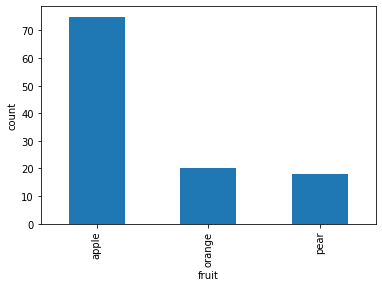

In [73]:
s_fruit_count = Series()
s_fruit_count["apple"]=df[df["fruit"] == "apple"]["count"].sum()
s_fruit_count["orange"]=df[df["fruit"]=="orange"]["count"].sum()
s_fruit_count["pear"]=df[df["fruit"]=="pear"]["count"].sum()
ax =s_fruit_count.plot.bar()
ax.set_xlabel("fruit")
ax.set_ylabel("count")

In [79]:

s_fruit_count = Series()
s_fruit_count["apple"] = df[df["count"] == 75]["fruit"]
s_fruit_count["orange"] = df[df["count"] == 20]["fruit"]
s_fruit_count["pear"] = df[df["count"]== 18]["fruit"]
ax = s_fruit_count.plot.bar()
ax.set_xlabel("fruit")
ax.set_ylabel("count")

<ipython-input-79-42cf642ac1c4>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s_fruit_count = Series()


TypeError: no numeric data to plot

Text(17.200000000000003, 0.5, 'count')

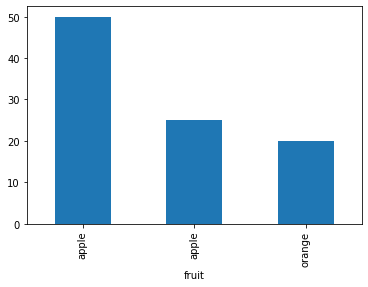

In [81]:

df.set_index("fruit")["count"].sort_index()[:3].plot.bar()
ax.set_xlabel("fruit")
ax.set_ylabel("count")

In [82]:

ax = df.set_index("fruit").sum().plot.bar()
ax.set_xlabel("fruit")
ax.set_ylabel("count")

TypeError: no numeric data to plot

<AxesSubplot:xlabel='y', ylabel='x'>

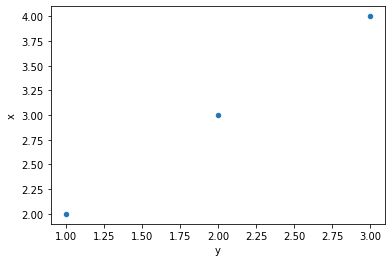

In [85]:
data = []
for i in range(3):
    data.append({"y": i+1, "x": i+2})
DataFrame(data).plot.scatter(x='y', y='x')

In [86]:
s = Series(["red", "red", "red",
            "green", "blue", "blue"])

vc = s.value_counts()

<AxesSubplot:>

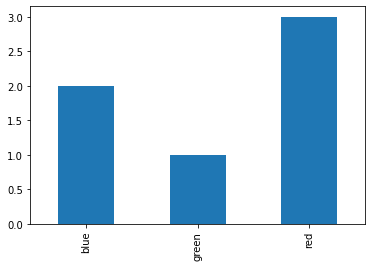

In [87]:
vc.sort_index().plot.bar()

<AxesSubplot:>

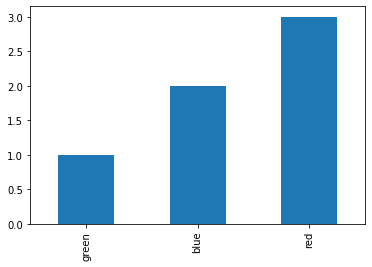

In [89]:
vc.sort_values().plot.bar()

In [97]:
def draw(x=0, y=0, move="X"):
    i = 1
    while(i < 6):
        if i%2 == 0:
            print("-+-+-", end="")
        else:
            j = 0
            while j < 5:
                if j % 2 != 0:
                    print("|", end="")
                elif i == 2*x + 1 and j == 2*y:
                    print(move, end="")
                else:
                    print(" ", end="")
                j += 1
        print()
        i += 1

In [98]:
draw(0,1)

 |X| 
-+-+-
 | | 
-+-+-
 | | 


In [99]:
draw(1,2,"x")

 | | 
-+-+-
 | |x
-+-+-
 | | 


In [100]:
draw(-1,-1,"O")

 | | 
-+-+-
 | | 
-+-+-
 | | 
